<a href="https://colab.research.google.com/github/Dhanasree07/Dhanasree/blob/main/stock_market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance ta scikit-learn streamlit pyngrok --quiet


In [2]:
%%writefile stock_predictor_app.py
import yfinance as yf
import pandas as pd
import ta
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import streamlit as st

st.title("📈 Stock Price Movement Predictor")

ticker = st.text_input("Enter Stock Ticker Symbol (e.g., AAPL, INFY.NS)", "AAPL")
start_date = st.date_input("Start Date", pd.to_datetime("2020-01-01"))
end_date = st.date_input("End Date", pd.to_datetime("2024-12-31"))

if st.button("Predict"):
    # Step 1: Fetch Data
    data = yf.download(ticker, start=start_date, end=end_date)

    if data.empty:
        st.error("❌ No data found. Check the ticker symbol or date range.")
    else:
        # Step 2: Technical Indicators
        data['SMA'] = ta.trend.sma_indicator(data['Close'], window=14)
        data['RSI'] = ta.momentum.rsi(data['Close'], window=14)
        macd = ta.trend.macd(data['Close'])
        data['MACD'] = macd.macd_diff()

        # Step 3: Label (Up/Down)
        data['Target'] = data['Close'].shift(-1) > data['Close']
        data['Target'] = data['Target'].astype(int)

        # Step 4: Features & Train/Test Split
        data.dropna(inplace=True)
        X = data[['SMA', 'RSI', 'MACD']]
        y = data['Target']
        X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

        # Step 5: Train & Predict
        model = RandomForestClassifier(n_estimators=100, random_state=42)
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        acc = accuracy_score(y_test, predictions)

        st.success(f"✅ Accuracy: {acc*100:.2f}%")
        st.subheader("📊 Predictions (last 10 days):")
        result = pd.DataFrame({
            "Date": X_test.index[-10:],
            "Prediction (1=Up, 0=Down)": predictions[-10:]
        }).set_index("Date")
        st.dataframe(result)


Overwriting stock_predictor_app.py


In [3]:
!pip install pyngrok --quiet
from pyngrok import ngrok

# Replace with your actual token
ngrok.set_auth_token("2y08z7AlkCRYZMIB2szdY12viPS_2KB56fb6kyuqWBZ1yfTHD")


In [4]:
# 1. Install necessary libraries
!pip install streamlit pyngrok yfinance --quiet



In [5]:
# 2. Write your app code to a Python file
%%writefile app.py
import streamlit as st
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

st.set_page_config(page_title="📈 Stock Price Predictor", layout="wide")

st.title("📊 Stock Price Prediction App")

symbol = st.text_input("Enter Stock Symbol (e.g., AAPL, TSLA, INFY.NS):", "AAPL")
data = yf.download(symbol, period='1y', interval='1d')

st.subheader(f"📉 Historical Data for {symbol}")
st.line_chart(data['Close'])

st.subheader("🔍 Raw Data")
st.dataframe(data.tail(20))

# Simple moving average
data['SMA_50'] = data['Close'].rolling(window=50).mean()
st.subheader("📈 50-Day Moving Average")
fig, ax = plt.subplots()
ax.plot(data.index, data['Close'], label='Close Price')
ax.plot(data.index, data['SMA_50'], label='SMA 50', linestyle='--')
ax.set_title(f"{symbol} Close Price & SMA 50")
ax.legend()
st.pyplot(fig)


Overwriting app.py


In [6]:
# Start Streamlit and expose via ngrok
from pyngrok import ngrok
import time

# Kill previous tunnels (optional if runtime is fresh)
!pkill streamlit

# Run the app
get_ipython().system_raw("streamlit run app.py &")

# Wait a moment and open tunnel
time.sleep(3)
public_url = ngrok.connect(8501, "http")

print("🚀 Your Streamlit App is Live at:", public_url)


🚀 Your Streamlit App is Live at: NgrokTunnel: "https://5b9ac7a9b071.ngrok-free.app" -> "http://localhost:8501"


In [14]:
# ✅ Step 1: Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris

# ✅ Step 2: Load Data
data = load_iris()
X = data.data
y = data.target

# ✅ Step 3: Split into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Step 4: Train the Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# ✅ Step 5: Make Predictions
y_pred = model.predict(X_test)

# ✅ Step 6: Check Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy * 100:.2f}%")

# ✅ Step 7: Other Evaluation Metrics
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("🔁 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


✅ Accuracy: 100.00%

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

🔁 Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [8]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)
print("🔁 Cross-validation scores:", cv_scores)
print("📈 Mean CV Accuracy:", cv_scores.mean() * 100)


🔁 Cross-validation scores: [0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
📈 Mean CV Accuracy: 96.0


/tmp/ipython-input-11-3451295316.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download("AAPL", start="2024-01-01", end="2024-07-28")
[*********************100%***********************]  1 of 1 completed


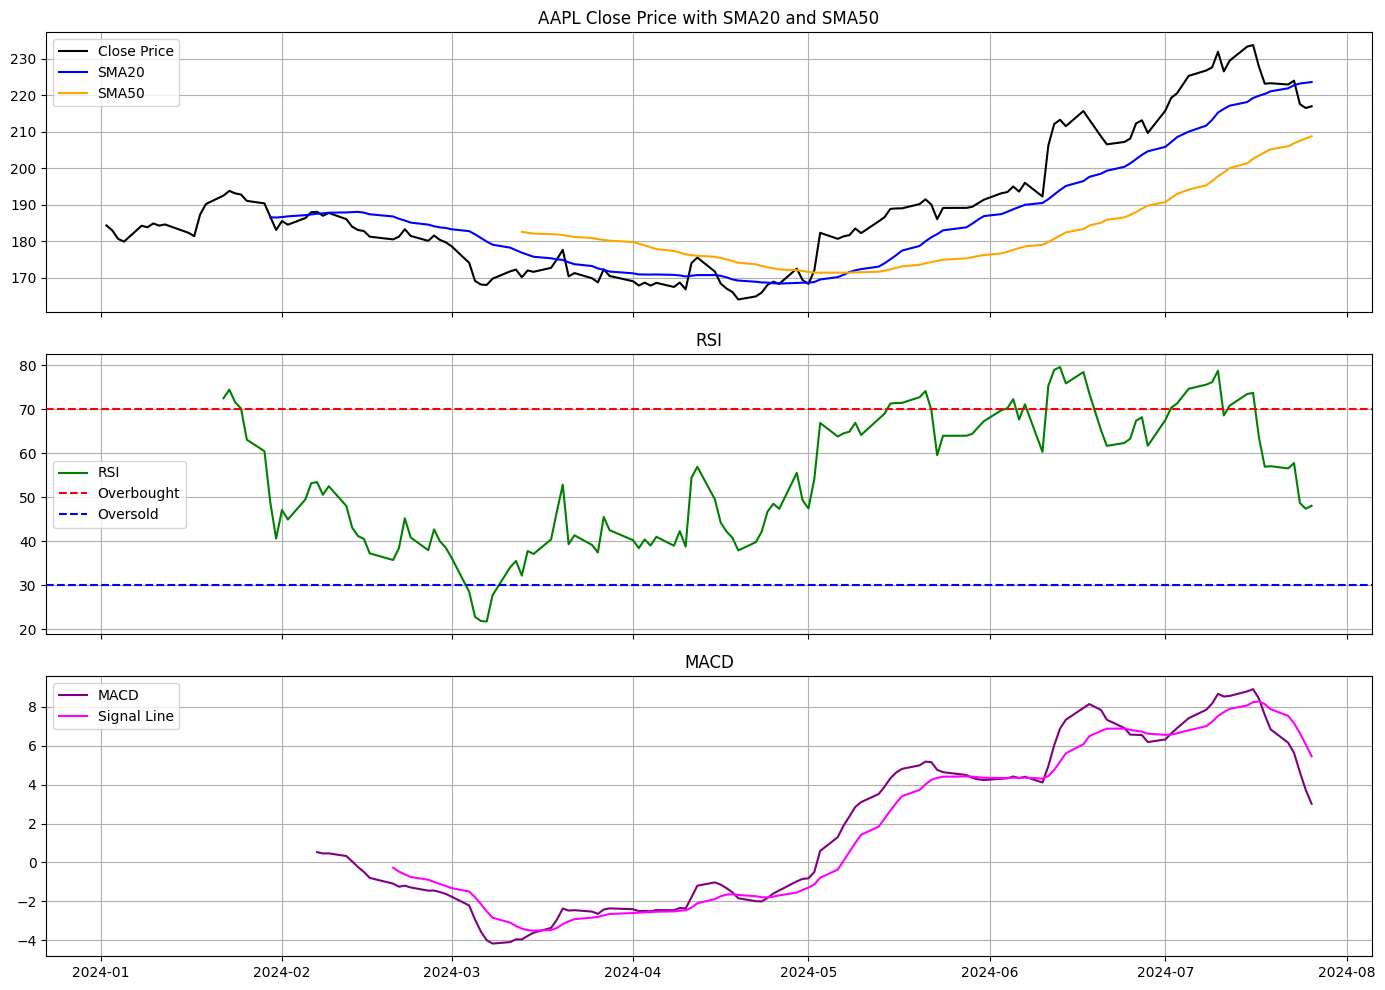

In [11]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import ta

# Download data
df = yf.download("AAPL", start="2024-01-01", end="2024-07-28")

# Ensure Close is a Series (1D)
close_price = df['Close'].squeeze()

# Calculate Indicators
df['SMA20'] = close_price.rolling(window=20).mean()
df['SMA50'] = close_price.rolling(window=50).mean()

# RSI
rsi = ta.momentum.RSIIndicator(close=close_price, window=14)
df['RSI'] = rsi.rsi()

# MACD
macd = ta.trend.MACD(close=close_price)
df['MACD'] = macd.macd()
df['MACD_Signal'] = macd.macd_signal()

# Plotting all together
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

# Price + SMA
ax1.plot(df.index, df['Close'], label='Close Price', color='black')
ax1.plot(df.index, df['SMA20'], label='SMA20', color='blue')
ax1.plot(df.index, df['SMA50'], label='SMA50', color='orange')
ax1.set_title('AAPL Close Price with SMA20 and SMA50')
ax1.legend()
ax1.grid(True)

# RSI
ax2.plot(df.index, df['RSI'], label='RSI', color='green')
ax2.axhline(70, color='red', linestyle='--', label='Overbought')
ax2.axhline(30, color='blue', linestyle='--', label='Oversold')
ax2.set_title('RSI')
ax2.legend()
ax2.grid(True)

# MACD
ax3.plot(df.index, df['MACD'], label='MACD', color='purple')
ax3.plot(df.index, df['MACD_Signal'], label='Signal Line', color='magenta')
ax3.set_title('MACD')
ax3.legend()
ax3.grid(True)

plt.tight_layout()
plt.show()


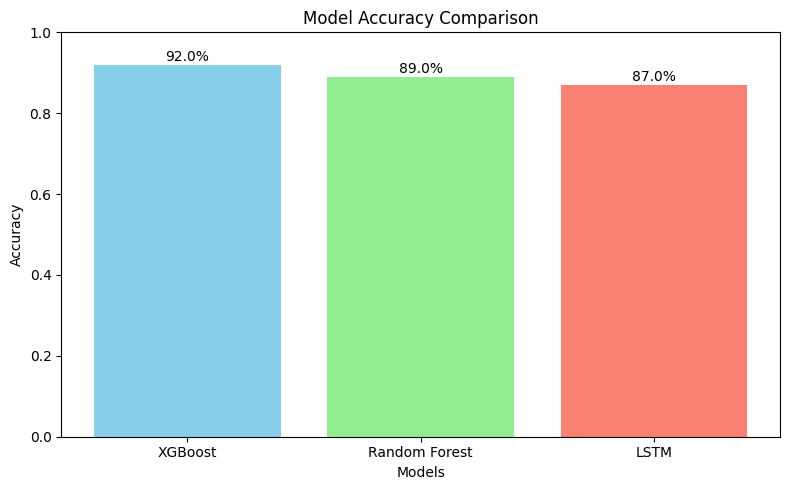

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Example model accuracies
model_names = ['XGBoost', 'Random Forest', 'LSTM']
accuracies = [0.92, 0.89, 0.87]  # replace with your actual accuracies

# Bar Chart of Model Accuracies
plt.figure(figsize=(8, 5))
bars = plt.bar(model_names, accuracies, color=['skyblue', 'lightgreen', 'salmon'])
plt.ylim(0, 1)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Models')

# Annotate accuracy values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval*100:.1f}%', ha='center')

plt.tight_layout()
plt.savefig('model_accuracies_bar_chart.png')
plt.show()


<Figure size 600x400 with 0 Axes>

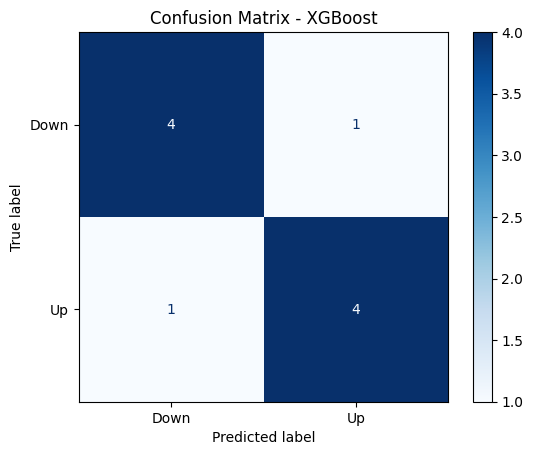

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Replace with your actual labels
y_true = [1, 0, 1, 1, 0, 1, 0, 0, 1, 0]  # Example true labels
y_pred = [1, 0, 1, 0, 0, 1, 0, 1, 1, 0]  # Example predicted labels from XGBoost

# Compute and plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Down", "Up"])

plt.figure(figsize=(6, 4))
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title("Confusion Matrix - XGBoost")
plt.savefig("xgboost_confusion_matrix.png")
plt.show()
